In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
path = '/Users/rafalkolakowski/Desktop/DA/Week 5/labs/csv/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(path)

In [6]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
df.shape

(2443651, 9)

In [8]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [9]:
#1.1
frequency_table = df['category'].value_counts().head(5)
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

/var/folders/h0/4jpjr28x5yj6tn2nqwlp8cn40000gn/T/ipykernel_30769/1757266753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = frequency_table.index,


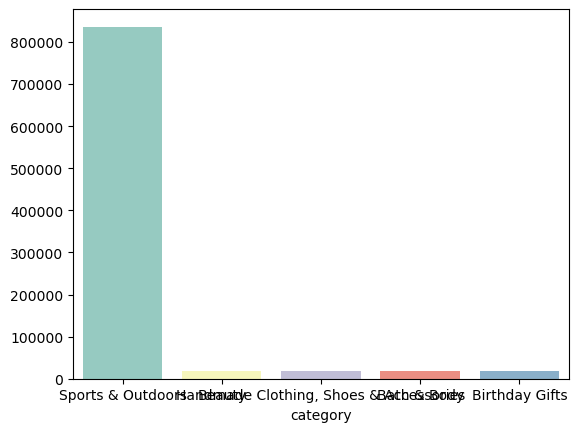

In [10]:
#1.2
sns.barplot(x = frequency_table.index,
            y = frequency_table.values,
            palette="Set3")
plt.show()

<Axes: ylabel='count'>

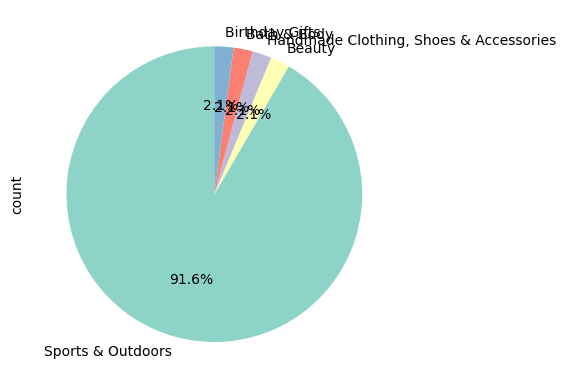

In [11]:
#1.2
frequency_table.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3"), 
    labels=frequency_table.index)

In [12]:
#2
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode()

mean, median, mode

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

In [13]:
variance = df['price'].var()
stdv = df['price'].std()
range = (df['price'].max() - df['price'].min())
quantiles_price = df["price"].quantile([0.25, 0.50, 0.75])

variance, stdv, range, quantiles_price

#standard deviation says a lot about significant spread in prices, 75% products are having price 45.99 or lower, meaning that there are some outliers with enormous prices which have impact on our results

(119445.48532256528,
 345.60886175352226,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

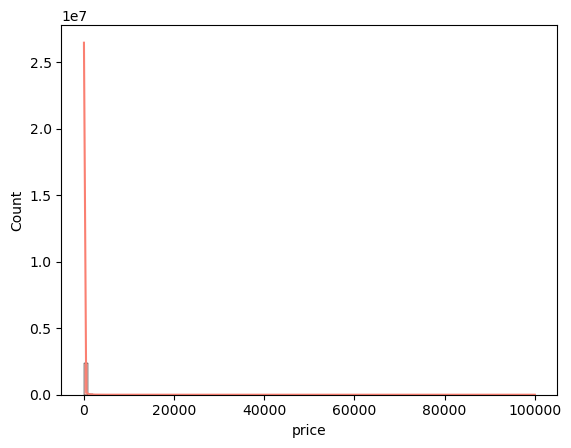

In [14]:
sns.histplot(df['price'], kde=True, bins=100, color = "salmon")
plt.show()

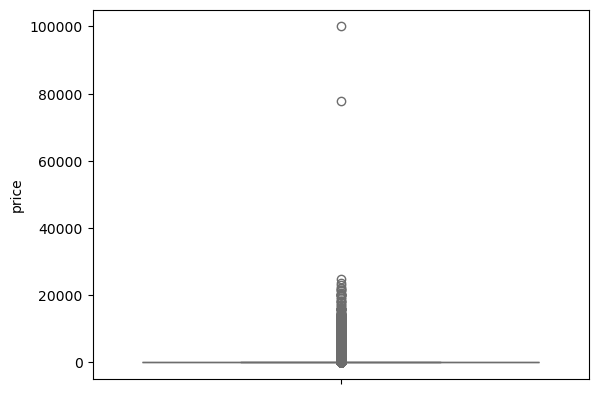

In [15]:
sns.boxplot(df['price'], color = "salmon")
plt.show()

In [16]:
#it is hard to read these diagrams, beace of the data spread, to avoid this we should group what price categories we would like to present, or filter outliers out

In [17]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [18]:
#3
df['stars'].mean(), df['stars'].median(), df['stars'].mode()
#customers generally dont rate the products

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

In [19]:
df['stars'].var(), df['stars'].std(), df['stars'].quantile([0.25, 0.50, 0.75])
#50% of products have no ratings, but the top 25% (Q3) have ratings of 4.4 or lower. The high standard deviation (2.19) indicates a large disparity—most products are unrated but those that do receive ratings tend to have high scores

(4.81743402976196,
 2.1948653785054697,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [20]:
skewness_price = df["stars"].skew()
kurtosis_price = df["stars"].kurtosis()

skewness_price, kurtosis_price
#this is positively skewed

(0.08120735761080985, -1.9260061280432985)

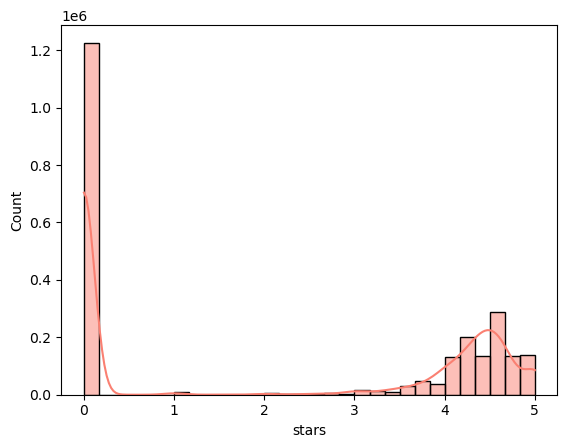

In [21]:
sns.histplot(df["stars"], kde=True, bins=30, color = "salmon")
plt.show()

In [22]:
#most of the rating is 0